In [1]:
import numpy as np                                   #to o find the minimum argument of a list 
import math                                          #for defining our functions
import random                                        #it will be used for sampling
from matplotlib import pyplot as plt                 # help visualize our results 
from IPython.display import clear_output

PI = 3.1415926
e = 2.71828


# (Generating random number in  a particular range + defining the function)

In [2]:
def get_rand_number(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

In [3]:
# lets also define the function we want to integrate over f(x)

def f_of_x(x,z):
    """
    This is the main function we want to calculate  over duration.
    Args:
    - x (float), z(float) : input to function; 
    Return:
    - output of function f(x) (float)
    """
    return (5*x)+(2*z)+5 



# Crude Monte Carlo


In [4]:
def crude_monte_carlo(num_samples=5000):
    """
    This function performs the Crude Monte Carlo for our
   
    Args:
    - num_samples (float) : number of samples
    Return:
    - Crude Monte Carlo estimation (float)
    
    """
    lower_bound = 0
    upper_bound = 3
    
    y_probability=[]
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        z = get_rand_number(lower_bound, upper_bound)
        y_probability.append(i)
        sum_of_samples += f_of_x(x,z)
        
    
    return  float(sum_of_samples/num_samples),y_probability

# Determine the Variance of Our Estimation

<blockquote>We can quantify our accuracy by finding the variance of our estimations. The variance is defined to be “the average of the square distances from the mean” . It can be be shown to equal this equation:</blockquote>

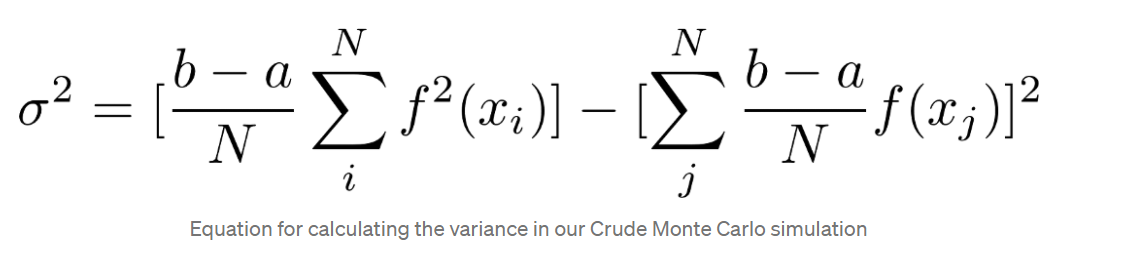


In [5]:
def get_crude_MC_variance(num_samples):
    """
    This function returns the variance fo the Crude Monte Carlo.
    Note that the inputed number of samples does not neccissarily
    need to correspond to number of samples used in the Monte
    Carlo Simulation.
    Args:
    - num_samples (int)
    Return:
    - Variance for Crude Monte Carlo approximation of f(x) (float)
    """
    int_max =3  # this is the max of our  range
    
    # get the average of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        z = get_rand_number(0, int_max)
        running_total += f_of_x(x,z)**2
    sum_of_sqs = running_total*int_max / num_samples
    
    # get square of average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        z = get_rand_number(0, int_max)
        running_total = f_of_x(x,z)
    sq_ave = (int_max*running_total/num_samples)**2
    
    return sum_of_sqs - sq_ave

## Performance, varianc and error calculation

In [9]:
var_samples = 20
MC_samples = 10000
crude_estimation = crude_monte_carlo(MC_samples)
variance = get_crude_MC_variance(var_samples)
error = math.sqrt(variance/MC_samples)
y_probability=crude_estimation[1]
print(f"Monte Carlo Approximation of f(x): {crude_estimation[0]}")
print(f"Variance of Approximation: {variance}")
print(f"Error in Approximation: {error}")

Monte Carlo Approximation of f(x): 15.493605097203979
Variance of Approximation: 843.9599915872124
Error in Approximation: 0.2905098951132667


In [10]:

print(y_probability)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

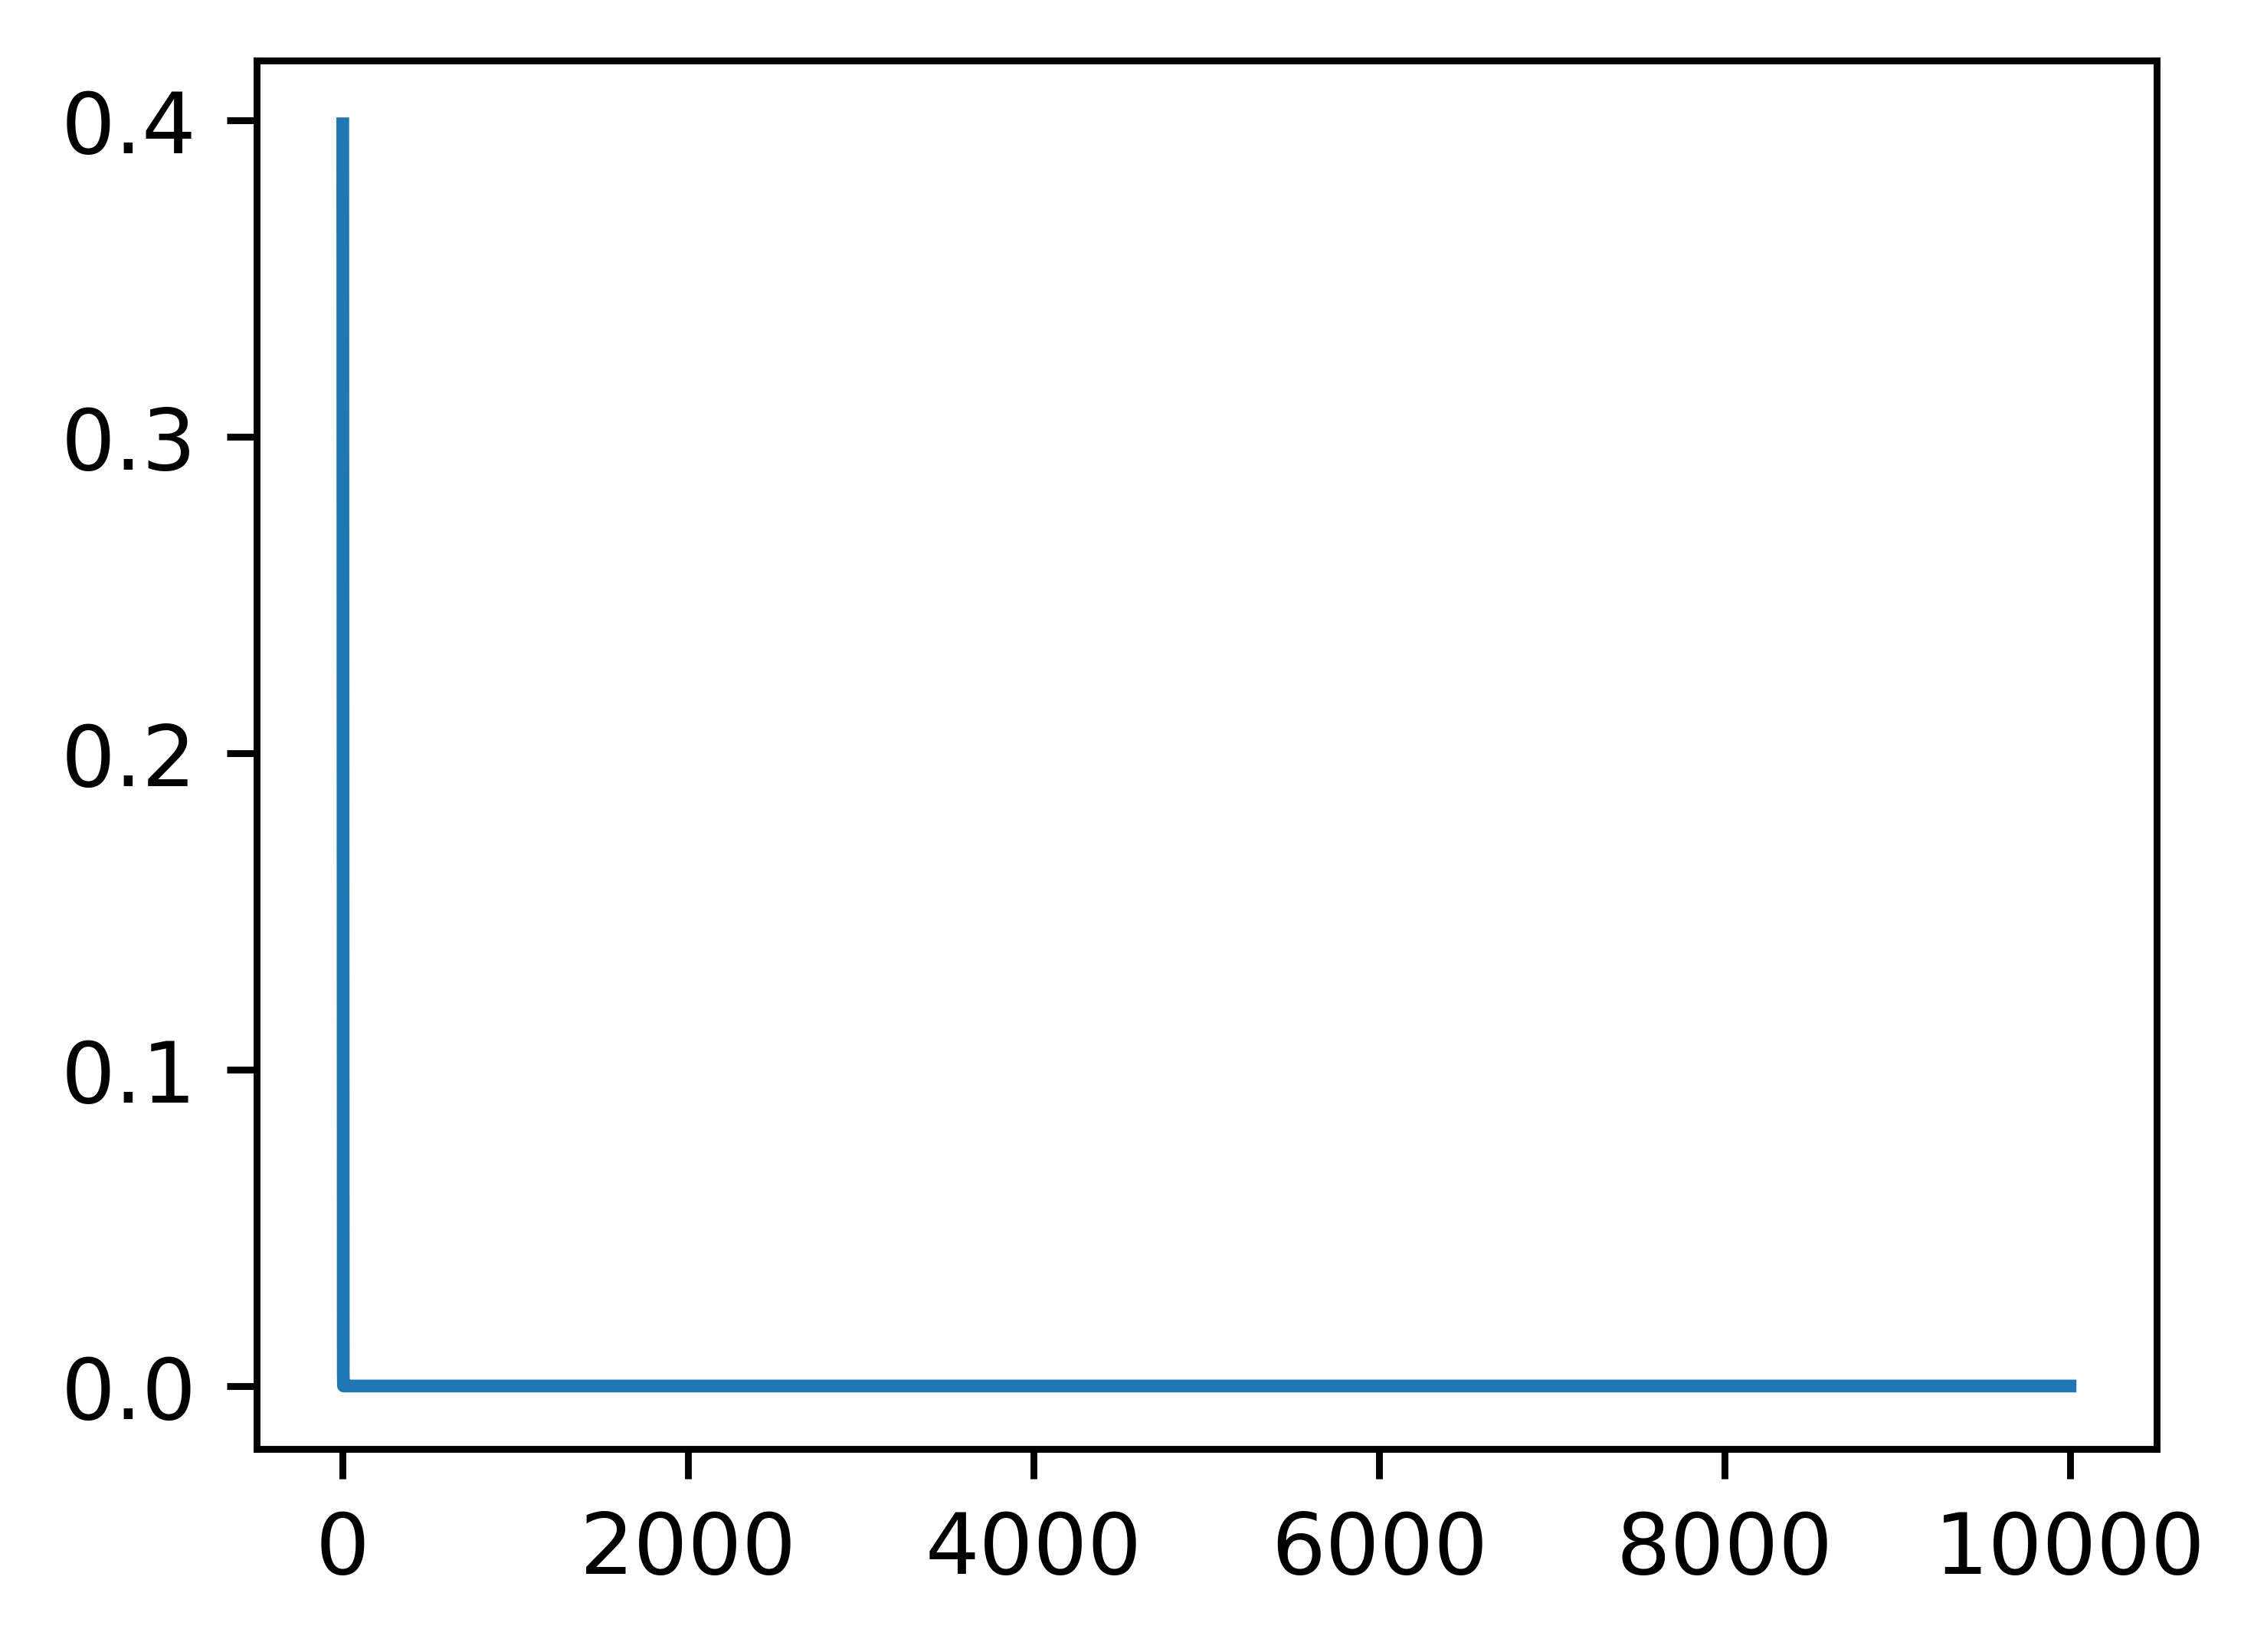

In [15]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
w = 4
h = 3
d = 800
plt.figure(figsize=(w, h), dpi=d)
plt.plot(norm.pdf(y_probability))
plt.savefig("out.png")